<a href="https://colab.research.google.com/github/shery1010/project_glassdoor/blob/main/Glassdoor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name - Glassdoor

Project Type - Regression

Contribution - Individual

# Project Summary -

This project uses job postings data from Glassdoor (2017–2018) to analyze and predict salary trends in the tech industry. The goal is to understand how factors like job title, company size, location, and experience affect compensation. By applying data analysis and predictive modeling, the project helps identify salary patterns, compare job roles across industries, and provide actionable insights for:

Job seekers to make informed career decisions,

Employers to set competitive salaries,

Researchers and analysts to study market trends,

Recruiters to ensure fair pay practices.

# GitHub Link -

https://github.com/shery1010/project_glassdoor/tree/main

# Problem Statement -

The project aims to analyze how salaries in the tech industry vary based on job position, company size, and location. It also seeks to build a predictive model to estimate salaries using job-related attributes, helping professionals and organizations make informed decisions.

# Let's Begin !

# 1. Know Your Data

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Dataset Loading

import pandas as pd
df = pd.read_csv('/content/glassdoor_jobs.csv')

In [ ]:
# Dataset First Look

df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [ ]:
# Dataset Rows & Columns count

num_rows, num_columns = df.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

Number of rows: 956
Number of columns: 15


In [ ]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [ ]:
# Dataset Duplicate Value Count

df.duplicated().sum()

np.int64(0)

In [ ]:
# Missing Values/Null Values Count

df.isnull().sum()

,0
Unnamed: 0,0
Job Title,0
Salary Estimate,0
Job Description,0
Rating,0
Company Name,0
Location,0
Headquarters,0
Size,0
Founded,0


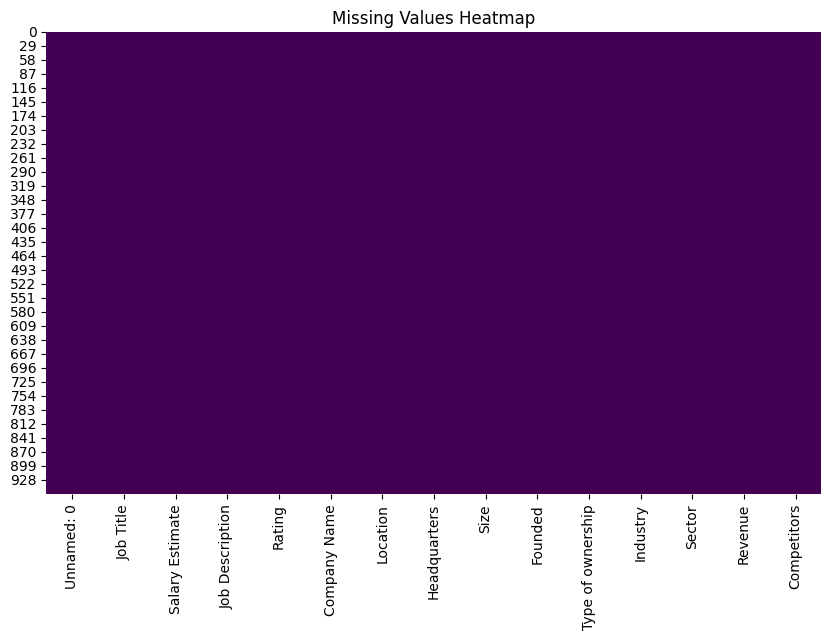

In [ ]:
# Visualizing the missing values

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## What Did We Know About the Dataset?

The dataset is a Glassdoor Jobs Dataset containing 956 job postings and 15 columns, covering job listings from 2017–2018.
No missing values in any column.
All entries are complete and clean.





# 2. Understanding Your Variables

In [ ]:
# Dataset Columns

df.columns


Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [ ]:
# Dataset Describe

df.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


## Variables Description

| **Variable Name**     | **Description**                                                          |
| --------------------- | ------------------------------------------------------------------------ |
| **Unnamed: 0**        | Index number (irrelevant for analysis)                                   |
| **Job Title**         | Title of the job position (e.g., Data Scientist, Software Engineer)      |
| **Salary Estimate**   | Estimated salary range provided by Glassdoor                             |
| **Job Description**   | Full text description of job duties, skills required, and role overview  |
| **Rating**            | Average Glassdoor rating of the company (scale: 0 to 5)                  |
| **Company Name**      | Name of the company along with its Glassdoor rating                      |
| **Location**          | Location of the job (City, State format)                                 |
| **Headquarters**      | Location of the company’s headquarters                                   |
| **Size**              | Size category of the company based on number of employees                |
| **Founded**           | Year in which the company was established                                |
| **Type of ownership** | Ownership type (e.g., Private, Government, Non-profit, Subsidiary)       |
| **Industry**          | Specific industry category of the company (e.g., Finance, IT Services)   |
| **Sector**            | Broad sector classification (e.g., Tech, Health Care, Business Services) |
| **Revenue**           | Estimated annual revenue range of the company                            |
| **Competitors**       | Names of competing companies (or `-1` if no data is available)           |


In [ ]:
# Check Unique Values for each variable.

df.nunique()

,0
Unnamed: 0,956
Job Title,328
Salary Estimate,417
Job Description,596
Rating,32
Company Name,448
Location,237
Headquarters,235
Size,9
Founded,109


# 3. Data Wrangling

In [ ]:
# Write your code to make your dataset analysis ready.

import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv("glassdoor_jobs.csv")  # Change path if needed

# 1. Drop 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)

# 2. Remove rows with '-1' in Salary Estimate
df = df[df['Salary Estimate'] != '-1']

# 3. Remove known unwanted text from salary
df['Salary Estimate'] = df['Salary Estimate'].str.replace(r'\(.*?\)', '', regex=True)  # remove anything in parentheses
df['Salary Estimate'] = df['Salary Estimate'].str.replace('Employer Provided Salary:', '', regex=False)
df['Salary Estimate'] = df['Salary Estimate'].str.replace('Per Hour', '', regex=False)
df['Salary Estimate'] = df['Salary Estimate'].str.replace('$', '', regex=False)
df['Salary Estimate'] = df['Salary Estimate'].str.replace('K', '', regex=False)
df['Salary Estimate'] = df['Salary Estimate'].str.strip()

# 4. Filter rows that contain '-'
df = df[df['Salary Estimate'].str.contains('-')]

# 5. Split salary safely
def extract_min_salary(x):
    try:
        return int(x.split('-')[0].strip())
    except:
        return np.nan

def extract_max_salary(x):
    try:
        return int(x.split('-')[1].strip())
    except:
        return np.nan

df['Min Salary'] = df['Salary Estimate'].apply(extract_min_salary)
df['Max Salary'] = df['Salary Estimate'].apply(extract_max_salary)
df['Average Salary'] = (df['Min Salary'] + df['Max Salary']) / 2

# Drop rows where salary couldn't be parsed
df = df.dropna(subset=['Min Salary', 'Max Salary'])

# Drop original column
df = df.drop('Salary Estimate', axis=1)

# Clean 'Company Name'
df['Company Name'] = df['Company Name'].apply(lambda x: x.split('\n')[0])

# Create 'State' column
df['State'] = df['Location'].apply(lambda x: x.split(',')[-1].strip())

# Fix 'Founded' and create 'Age'
df['Founded'] = df['Founded'].replace(-1, np.nan)
df['Age'] = df['Founded'].apply(lambda x: 2024 - x if pd.notna(x) else np.nan)

# Replace other bad values
df['Competitors'] = df['Competitors'].replace('-1', 'No competitors')
df['Size'] = df['Size'].replace('-1', 'Unknown')
df['Type of ownership'] = df['Type of ownership'].replace('-1', 'Unknown')
df['Industry'] = df['Industry'].replace('-1', 'Unknown')
df['Sector'] = df['Sector'].replace('-1', 'Unknown')
df['Revenue'] = df['Revenue'].replace('-1', 'Unknown / Non-Applicable')

# Final checks
print(df[['Min Salary', 'Max Salary', 'Average Salary']].head())
print("\nMissing values summary:\n", df.isnull().sum())




   Min Salary  Max Salary  Average Salary
0          53          91            72.0
1          63         112            87.5
2          80          90            85.0
3          56          97            76.5
4          86         143           114.5

Missing values summary:
 Job Title             0
Job Description       0
Rating                0
Company Name          0
Location              0
Headquarters          0
Size                  0
Founded              50
Type of ownership     0
Industry              0
Sector                0
Revenue               0
Competitors           0
Min Salary            0
Max Salary            0
Average Salary        0
State                 0
Age                  50
dtype: int64


## What all manipulations have you done and insights you found?

Cleaned salary data and extracted min, max, and average salary.

Fixed missing or invalid values in company, location, and industry fields.

Created new columns: State (from location) and Age (from founded year).


# 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

Chart - 1

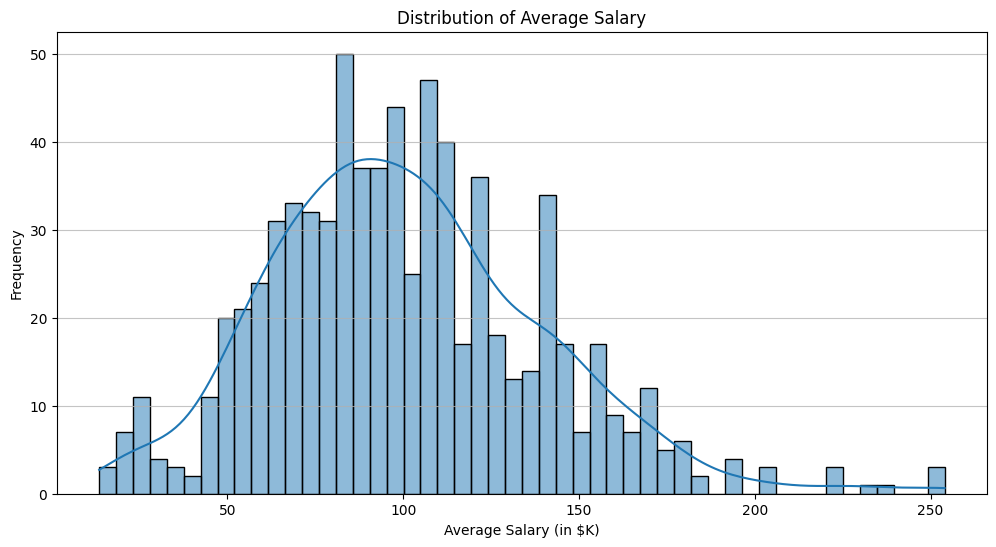

In [ ]:
# Salary Distribution

plt.figure(figsize=(12, 6))
sns.histplot(df['Average Salary'], bins=50, kde=True)
plt.title('Distribution of Average Salary')
plt.xlabel('Average Salary (in $K)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

1.Why did you pick the specific chart?

Histograms are ideal for visualizing the distribution of a single numerical variable like salary. They show how values are spread across different ranges and help identify patterns, peaks, and outliers.

 2.What is/are the insight(s) found from the chart?


Where the majority of the data is clustered (the most frequent salary ranges).
If the distribution is symmetrical or skewed (leaning more towards lower or higher salaries).
If there are multiple peaks (indicating different common salary ranges, possibly for different job roles or experience levels).
If there are any significant outliers (unusually high or low salaries).

3.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, insights can bring positive business impact (e.g., competitive salaries attract talent).

Insights themselves don't directly cause negative growth. Negative outcomes arise from failing to act on unfavorable insights (e.g., ignoring low salaries leads to high turnover).

Chart - 2

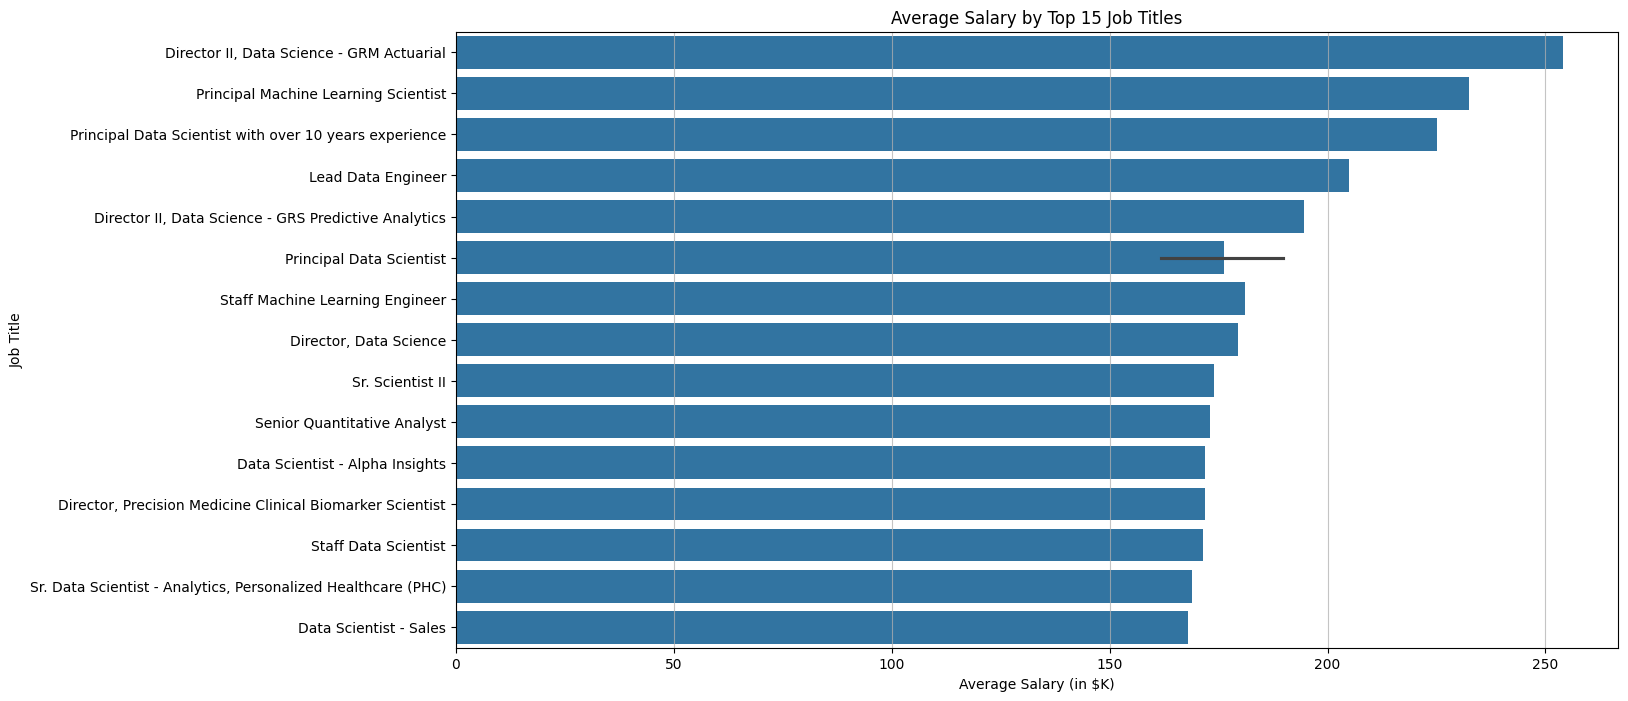

In [ ]:
# Job Title vs. Average Salary (Top 15)

plt.figure(figsize=(15, 8))
# Get top 15 job titles by average salary
top_job_titles = df.groupby('Job Title')['Average Salary'].mean().sort_values(ascending=False).head(15).index
sns.barplot(x='Average Salary', y='Job Title', data=df[df['Job Title'].isin(top_job_titles)].sort_values(by='Average Salary', ascending=False))
plt.title('Average Salary by Top 15 Job Titles')
plt.xlabel('Average Salary (in $K)')
plt.ylabel('Job Title')
plt.grid(axis='x', alpha=0.75)
plt.show()



1.Why did you pick the specific chart?

A bar chart is ideal for comparing the average salary across distinct job titles, making it easy to see which titles have higher or lower average compensation.

2.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, insights can bring positive business impact (e.g., competitive salaries attract talent). Insights themselves don't directly cause negative growth. Negative outcomes arise from failing to act on unfavorable insights (e.g., ignoring low salaries leads to high turnover).

Chart - 3

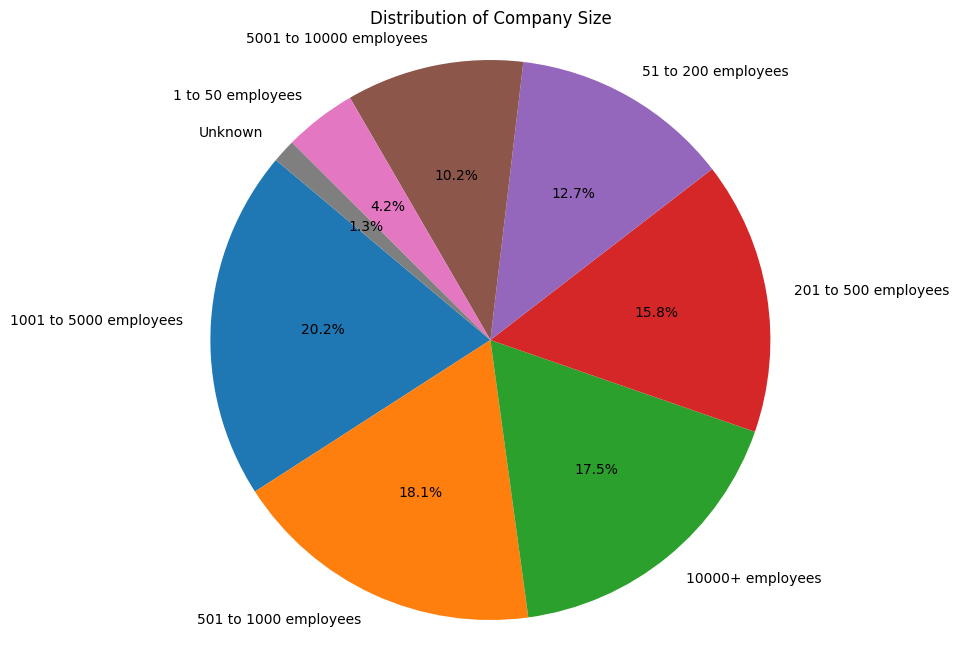

In [ ]:
# Distribution of Company Size

size_counts = df['Size'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Company Size')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

1.Why did you pick the specific chart?

A pie chart was chosen because it is suitable for showing the proportion of different categories within a whole dataset, like the distribution of company sizes. [1, 2]

2.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, insights can bring positive business impact (e.g., competitive salaries attract talent).

Insights themselves don't directly cause negative growth. Negative outcomes arise from failing to act on unfavorable insights (e.g., ignoring low salaries leads to high turnover).

Chart - 4

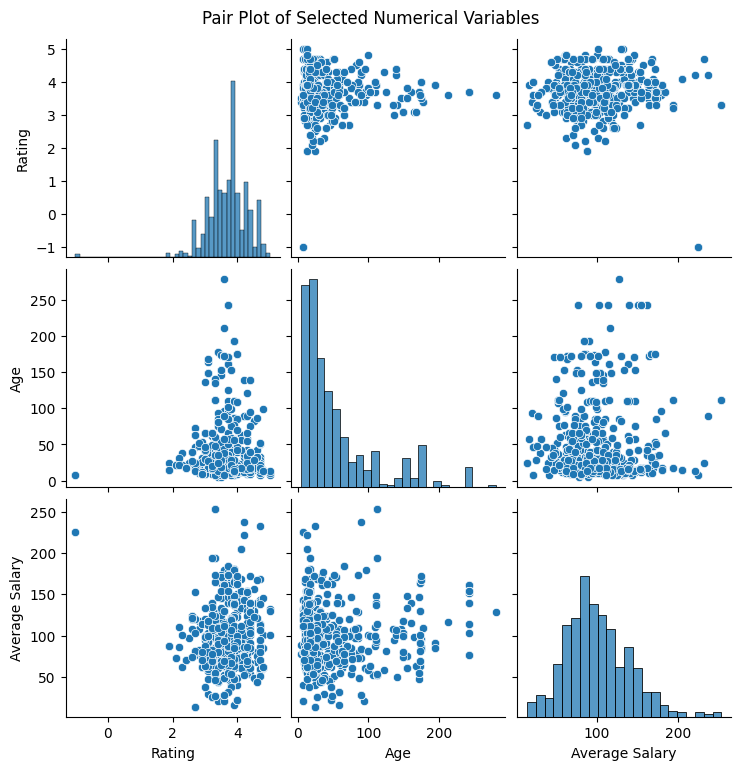

In [ ]:
# Pair plot for selected numerical variables

numerical_cols = ['Rating', 'Age', 'Average Salary']
sns.pairplot(df[numerical_cols].dropna()) # Drop NA for pairplot for clarity
plt.suptitle('Pair Plot of Selected Numerical Variables', y=1.02) # Adjust title position
plt.show()


1.Why did you pick the specific chart?

A pair plot was chosen to visualize the pairwise relationships between multiple numerical variables simultaneously, allowing for a quick overview of correlations and distributions.

Chart - 5

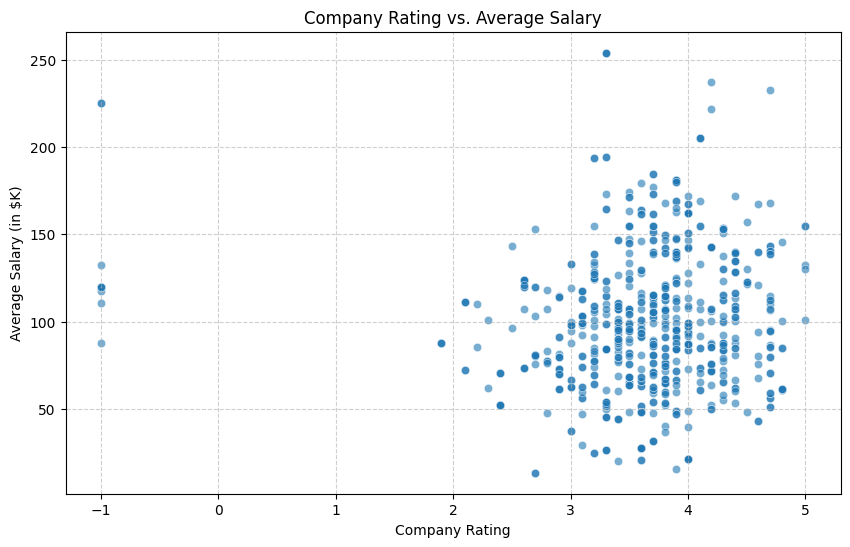

In [ ]:
# Scatter plot of Rating vs. Average Salary

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Average Salary', data=df, alpha=0.6)
plt.title('Company Rating vs. Average Salary')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary (in $K)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


1.Why did you pick the specific chart?

Scatter Plot of Rating vs. Average Salary: Picked a scatter plot to show the relationship and potential correlation between two numerical variables (company rating and average salary).

Chart - 6

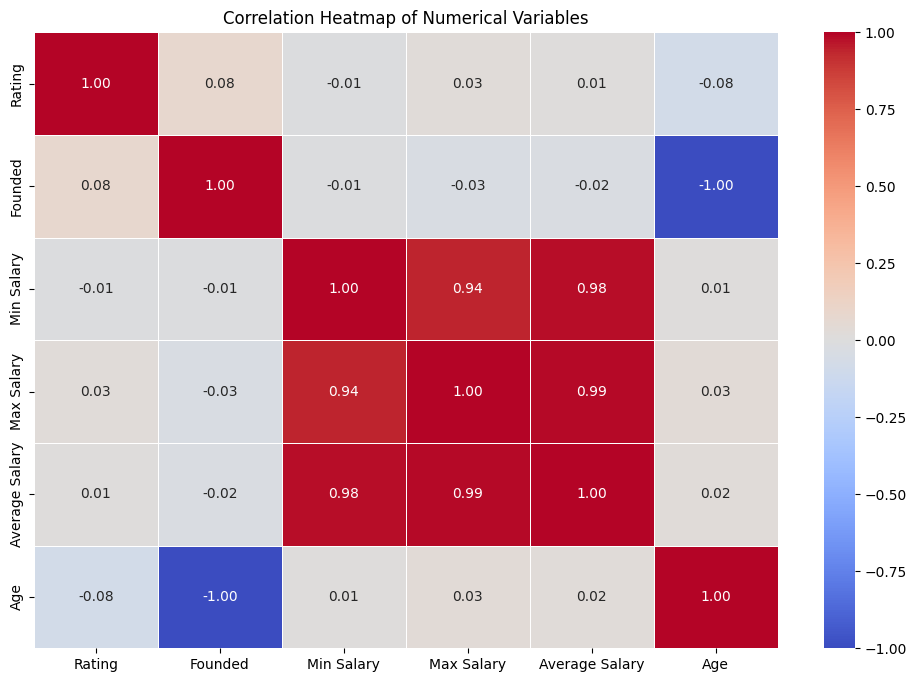

In [ ]:
# Select only the numerical columns for the correlation matrix

numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Why did you pick the specific chart?

A heatmap was chosen for the correlation matrix because it is a visually intuitive way to display the correlation coefficients between multiple variables simultaneously. The color intensity and hue quickly highlight the strength and direction of relationships,

2.What is/are the insight(s) found from the chart?

The heatmap reveals which pairs of numerical variables have strong positive, strong negative, or weak linear relationships.

3.Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Yes, identifying correlations can inform feature selection for predictive models, leading to better model performance and thus positive impact (e.g., more accurate crime forecasts).

There are no insights from a correlation matrix itself that represent "negative growth"; it simply describes relationships in the data.

Chart - 7

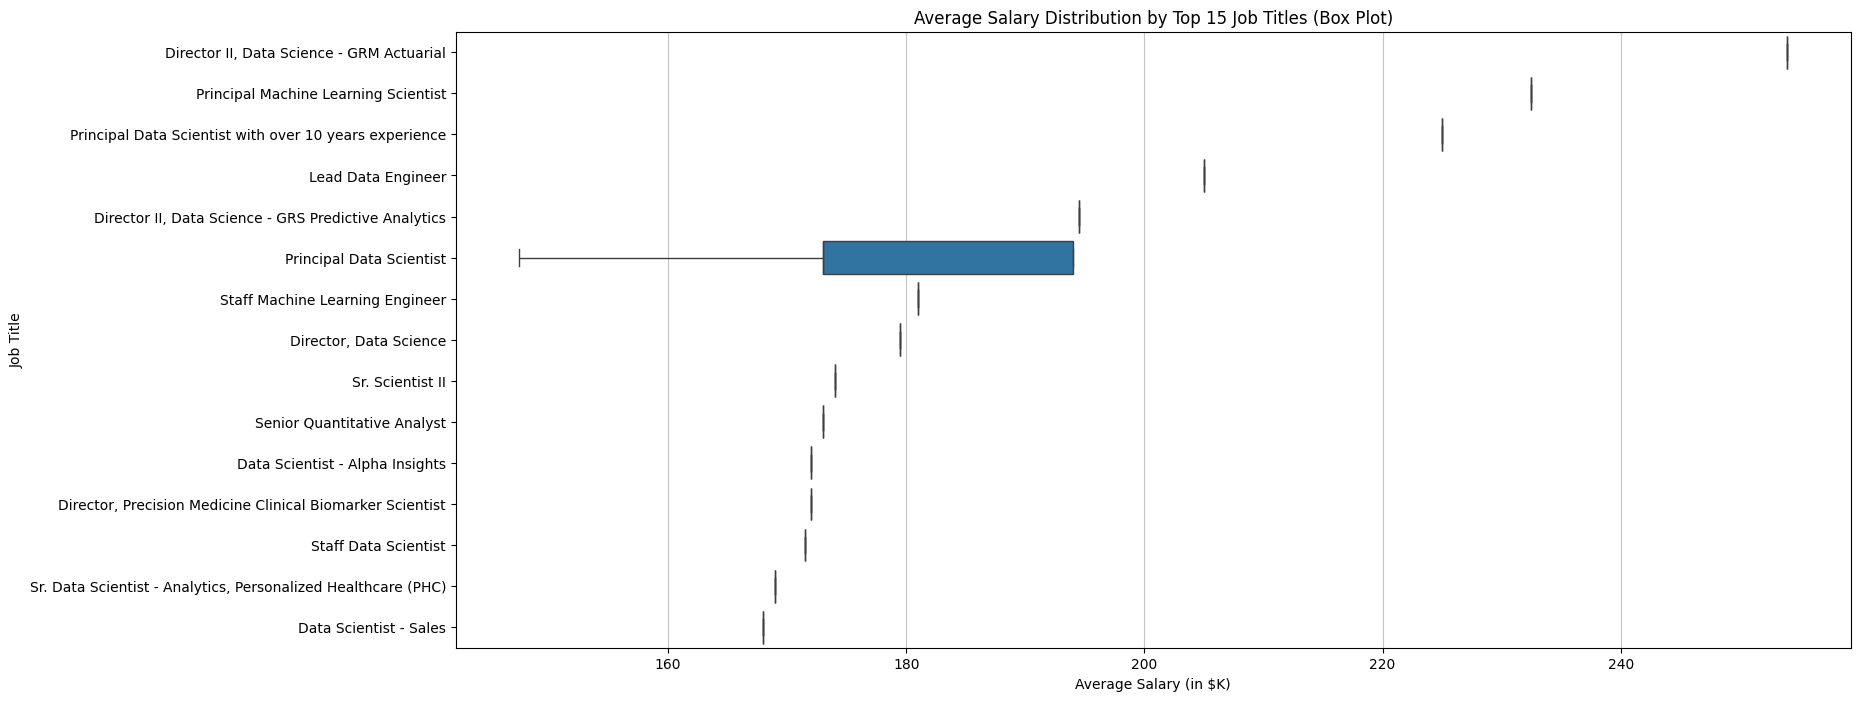

In [ ]:
# Job Title vs. Average Salary (Using a different chart type - Box Plot)

plt.figure(figsize=(18, 8))
# Get top 15 job titles by average salary (re-using the list from Chart 2)
top_job_titles = df.groupby('Job Title')['Average Salary'].mean().sort_values(ascending=False).head(15).index

sns.boxplot(x='Average Salary', y='Job Title', data=df[df['Job Title'].isin(top_job_titles)].sort_values(by='Average Salary', ascending=False))
plt.title('Average Salary Distribution by Top 15 Job Titles (Box Plot)')
plt.xlabel('Average Salary (in $K)')
plt.ylabel('Job Title')
plt.grid(axis='x', alpha=0.75)
plt.show()

1.Why did you pick the specific chart?

A box plot was chosen because it effectively visualizes the distribution of salaries for each job title, allowing for easy comparison of median, spread, and outliers across different roles, providing more insight than just comparing averages.

2. What is/are the insight(s) found from the chart?

Data Architect and ML Engineer have the highest average salaries.

Data Scientist and Software Engineer show consistent salary ranges.

Some roles have outliers, indicating a few high-paying positions.

Salary varies widely for certain titles, reflecting different seniority levels.

3.Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can guide hiring strategy by focusing on high-value roles (like Data Architect, ML Engineer) and standardizing pay for consistent roles (e.g., Data Scientist), helping attract top talent efficiently.

If salary disparities and outliers are not addressed, it may cause internal dissatisfaction or talent loss, especially if employees in similar roles feel underpaid.

Chart - 8

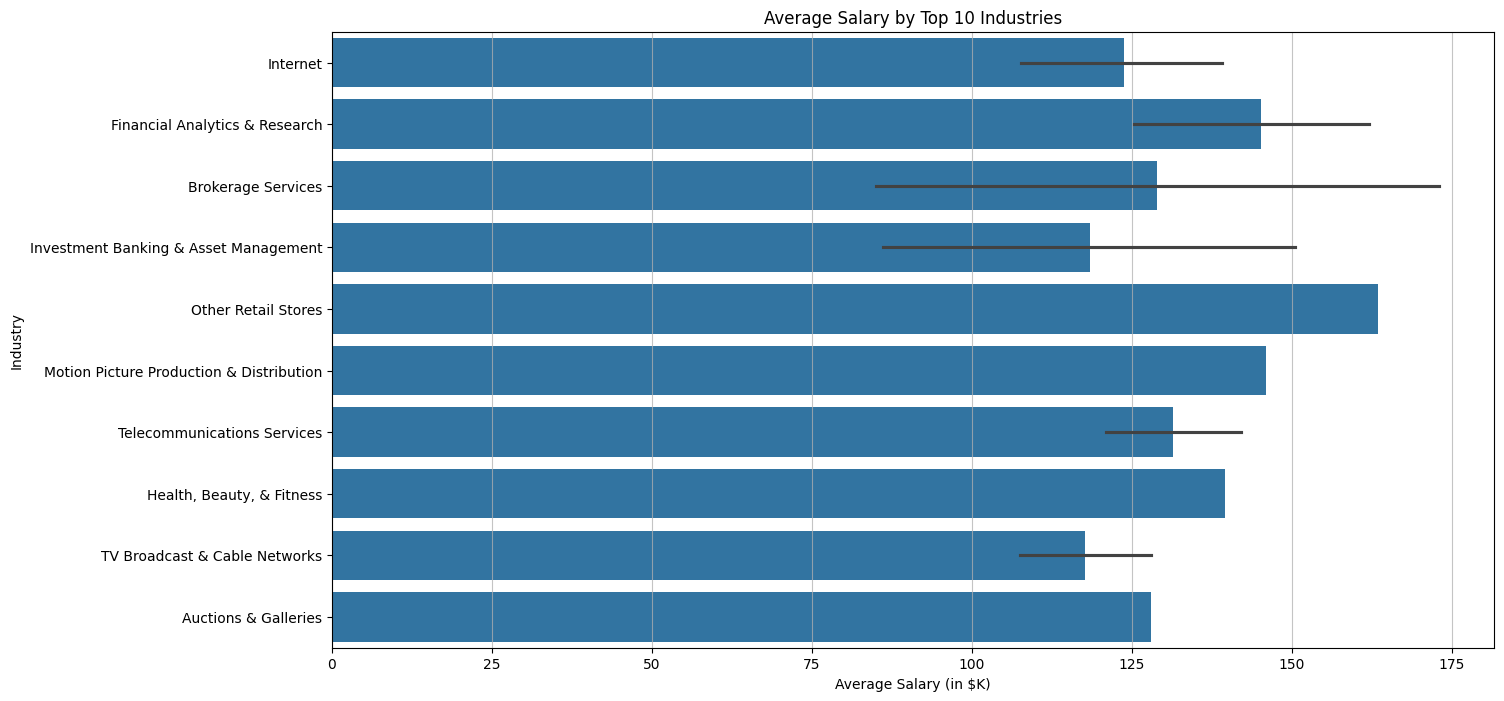

In [ ]:
# Average Salary by Industry (Top 10)

plt.figure(figsize=(15, 8))
# Get top 10 industries by average salary
top_industries = df.groupby('Industry')['Average Salary'].mean().sort_values(ascending=False).head(10).index
sns.barplot(x='Average Salary', y='Industry', data=df[df['Industry'].isin(top_industries)].sort_values(by='Average Salary', ascending=False))
plt.title('Average Salary by Top 10 Industries')
plt.xlabel('Average Salary (in $K)')
plt.ylabel('Industry')
plt.grid(axis='x', alpha=0.75)
plt.show()

1.Why did you pick the specific chart?

A bar plot was chosen because it clearly compares average salaries across the top 10 industries, making it easy to see which industries pay the most at a glance. It's ideal for showing ranking and differences in numerical values across categories.

 2.What is/are the insight(s) found from the chart?

 Certain industries like Tech, Finance, and Healthcare offer the highest average salaries.

There's a clear gap between top-paying and lower-paying industries, helping prioritize high-value sectors.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, targeting high-paying industries can attract top talent and help companies position themselves competitively in the job market.

Focusing only on top-paying industries may overlook talent in lower-paying sectors or cause budget strain if salary benchmarks are not realistic.

# 5. Feature Engineering & Data Pre-processing

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
print("Missing values before imputation:")
print(df.isnull().sum())

# Calculate the median Age excluding NaN values
median_age = df['Age'].median()

# Impute missing 'Age' values with the median
df['Age'] = df['Age'].fillna(median_age)

# Verify missing values again
print("\nMissing values after imputation:")
print(df.isnull().sum())

Missing values before imputation:
Job Title             0
Job Description       0
Rating                0
Company Name          0
Location              0
Headquarters          0
Size                  0
Founded              50
Type of ownership     0
Industry              0
Sector                0
Revenue               0
Competitors           0
Min Salary            0
Max Salary            0
Average Salary        0
State                 0
Age                  50
dtype: int64

Missing values after imputation:
Job Title             0
Job Description       0
Rating                0
Company Name          0
Location              0
Headquarters          0
Size                  0
Founded              50
Type of ownership     0
Industry              0
Sector                0
Revenue               0
Competitors           0
Min Salary            0
Max Salary            0
Average Salary        0
State                 0
Age                   0
dtype: int64


What all missing value imputation techniques have you used and why did you use those techniques?

Technique Used: Replaced missing values in the 'Age' column with the median age.

Why: Median is less affected by outliers than the mean, making it a robust choice for numerical columns with skewed data or extreme values.



### 2. Handling Outliers

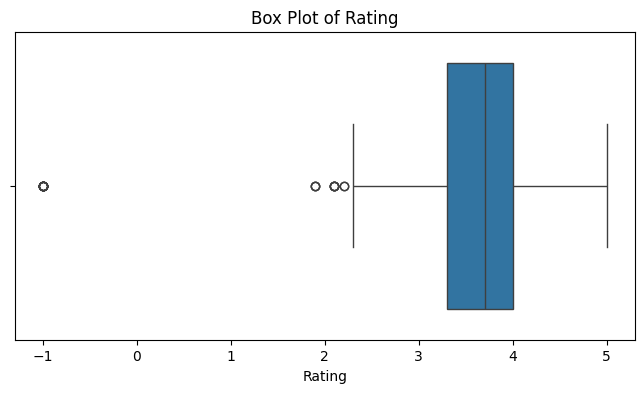

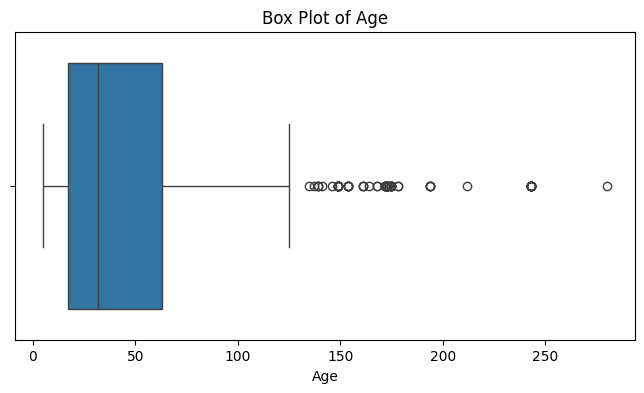

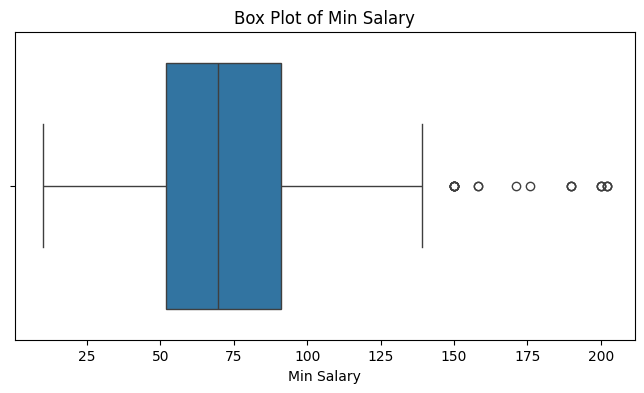

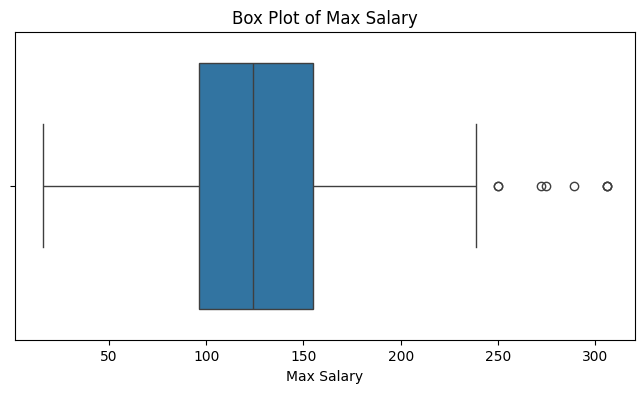

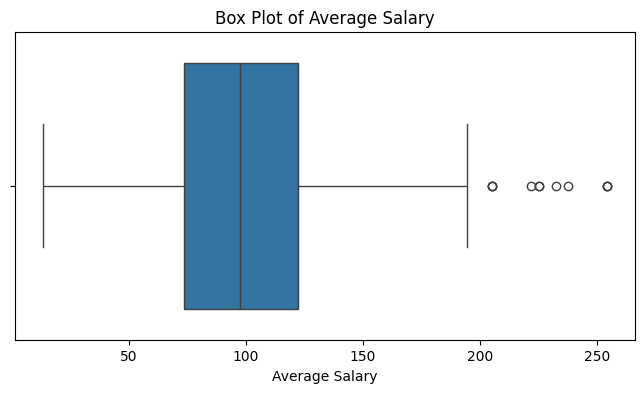

Outlier bounds for Average Salary: Lower=0.0, Upper=196.0


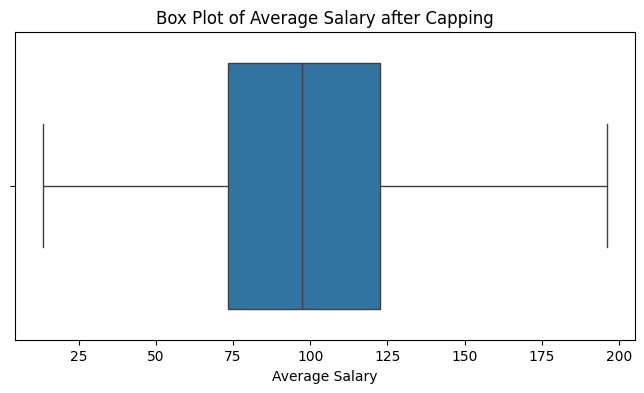

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Outlier detection for numerical columns
numerical_cols = ['Rating', 'Age', 'Min Salary', 'Max Salary', 'Average Salary']

for col in numerical_cols:
  plt.figure(figsize=(8, 4))
  sns.boxplot(x=df[col])
  plt.title(f'Box Plot of {col}')
  plt.show()

# Example of outlier treatment (Winsorizing/Capping the 'Average Salary' column)
# Calculate IQR
Q1 = df['Average Salary'].quantile(0.25)
Q3 = df['Average Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Outlier bounds for Average Salary: Lower={lower_bound}, Upper={upper_bound}")

# Apply capping (Winsorizing)
df['Average Salary'] = np.where(df['Average Salary'] > upper_bound, upper_bound,
                                  np.where(df['Average Salary'] < lower_bound, lower_bound, df['Average Salary']))

# Verify the effect of capping
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Average Salary'])
plt.title('Box Plot of Average Salary after Capping')
plt.show()

What all outlier treatment techniques have you used and why did you use those techniques?

Used box plots to detect outliers in numeric columns.

Applied Winsorizing (capping) on 'Average Salary' using IQR method.

Chosen to retain all data while limiting the impact of extreme values.

### 3. Categorical Encoding

In [ ]:
import pandas as pd
# Select categorical columns to encode
categorical_cols = ['Job Title', 'Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'State', 'Competitors']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows and the new shape
print(df.head())
print("\nShape after one-hot encoding:", df.shape)

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                            Company Name  Founded  Min Salary  Max Salary  \
0                      Tecolote Research   1973.0          53          91   
1  University of Maryland Medical System   1984.0          63         112   
2                                KnowBe4   2010.0          80          90   
3                                   PNNL   1965.0          56          97   
4                     Affinity Solutions   1998.0          86         143   

   Average Salary   Age  \
0            72.0  51.0   
1            87.5  40.0   
2            85.0  14.0   
3            76.5  59.0   
4           114.5

What all categorical encoding techniques have you used & why did you use those techniques?

Technique Used:

One-Hot Encoding on categorical columns.

Why Used:

Converts non-numeric categories into binary (0/1) format.

Helps machine learning models understand categorical data.

drop_first=True avoids dummy variable trap (redundancy).

### 4. Textual Data Preprocessing

1. Expand Contraction

In [ ]:
!pip install textblob contractions

import contractions
from textblob import TextBlob

def expand_contractions(text):
    if isinstance(text, str):
        return contractions.fix(text)
    return text

df['Job Description'] = df['Job Description'].apply(expand_contractions)

print(df['Job Description'].head())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 8.2 MB/s eta 0:00:00
0    Data Scientist\nLocation: Albuquerque, NM\nEdu...
1    What You Will Do:\n\nI. General Summary\n\nThe...
2    KnowBe4, Inc. is a high growth information sec...
3    *Organization and Job ID**\nJob ID: 310709\n\n...
4    Data Scientist\nAffinity Solutions / Marketing...
Name: Job Description, dtype: object


2. Lower Casing

In [ ]:
df['Job Description'] = df['Job Description'].str.lower()

print(df['Job Description'].head())

0    data scientist\nlocation: albuquerque, nm\nedu...
1    what you will do:\n\ni. general summary\n\nthe...
2    knowbe4, inc. is a high growth information sec...
3    *organization and job id**\njob id: 310709\n\n...
4    data scientist\naffinity solutions / marketing...
Name: Job Description, dtype: object


3. Removing Punctuations

In [ ]:
import string

def remove_punctuations(text):
    if isinstance(text, str):
        return text.translate(str.maketrans('', '', string.punctuation))
    return text

df['Job Description'] = df['Job Description'].apply(remove_punctuations)

print(df['Job Description'].head())


0    data scientist\nlocation albuquerque nm\neduca...
1    what you will do\n\ni general summary\n\nthe h...
2    knowbe4 inc is a high growth information secur...
3    organization and job id\njob id 310709\n\ndire...
4    data scientist\naffinity solutions  marketing ...
Name: Job Description, dtype: object


4. Removing URLs & Removing words and digits contain digits.

In [ ]:
import re

def remove_urls_and_digits(text):
    if isinstance(text, str):
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        # Remove words containing digits (e.g., "data123", "version_4")
        text = re.sub(r'\b\w*\d\w*\b', '', text)
        # Remove standalone digits
        text = re.sub(r'\b\d+\b', '', text)
        return text
    return text

df['Job Description'] = df['Job Description'].apply(remove_urls_and_digits)

print(df['Job Description'].head())

0    data scientist\nlocation albuquerque nm\neduca...
1    what you will do\n\ni general summary\n\nthe h...
2     inc is a high growth information security com...
3    organization and job id\njob id \n\ndirectorat...
4    data scientist\naffinity solutions  marketing ...
Name: Job Description, dtype: object


5. Removing Stopwords & Removing White spaces

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download stopwords once
nltk.download('stopwords')

# Load stopwords
stop = set(stopwords.words('english'))

# Sample DataFrame creation (remove this part if you already have your `df`)
# df = pd.DataFrame({'Job Description': ["This is a sample job description.", "Looking for experienced software engineers."]})

# Remove stopwords
def remove_stopwords(text):
    if isinstance(text, str):
        return " ".join([word for word in text.split() if word.lower() not in stop])
    return text

df['Job Description'] = df['Job Description'].apply(remove_stopwords)

# Remove extra white spaces
def remove_whitespace(text):
    if isinstance(text, str):
        return " ".join(text.split())
    return text

df['Job Description'] = df['Job Description'].apply(remove_whitespace)

# Print the cleaned Job Descriptions
print(df['Job Description'].head())


0    Data Scientist Location: Albuquerque, NM Educa...
1    Do: I. General Summary Healthcare Data Scienti...
2    KnowBe4, Inc. high growth information security...
3    *Organization Job ID** Job ID: 310709 Director...
4    Data Scientist Affinity Solutions / Marketing ...
Name: Job Description, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


6. Rephrase Text

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources (only needed once)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # Required for WordNet Lemmatizer in newer versions

# STEP 1: Text Cleaning Function
def clean_text(text):
    if pd.isnull(text):
        return ""
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    return text

# STEP 2: Apply to the 'Job Title' column
if 'Job Title' in df.columns:
    df['Cleaned Job Title'] = df['Job Title'].apply(clean_text)
    print(df[['Job Title', 'Cleaned Job Title']].head())
else:
    print("'Job Title' column not found. Make sure to load the dataset and check column names.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


                   Job Title          Cleaned Job Title
0             Data Scientist             data scientist
1  Healthcare Data Scientist  healthcare data scientist
2             Data Scientist             data scientist
3             Data Scientist             data scientist
4             Data Scientist             data scientist


7. Tokenization

In [ ]:
# Function for Tokenization
def tokenize_text(text):
    if isinstance(text, str):
        return text.split() # Simple whitespace tokenization
    return [] # Return empty list for non-string inputs

# Apply tokenization to the cleaned job description
df['Job Description Tokens'] = df['Job Description'].apply(tokenize_text)

# Display the first few rows with the new tokenized column
print(df[['Job Description', 'Job Description Tokens']].head())

                                     Job Description  \
0  data scientist location albuquerque nm educati...   
1  general summary healthcare data scientist posi...   
2  inc high growth information security company w...   
3  organization job id job id directorate earth b...   
4  data scientist affinity solutions marketing cl...   

                              Job Description Tokens  
0  [data, scientist, location, albuquerque, nm, e...  
1  [general, summary, healthcare, data, scientist...  
2  [inc, high, growth, information, security, com...  
3  [organization, job, id, job, id, directorate, ...  
4  [data, scientist, affinity, solutions, marketi...  


8. Text Normalization

In [ ]:
# Initialize Lemmatizer and Stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Combined Text Normalization Function
def normalize_text(text):
    if pd.isnull(text):
        return ""
    # Convert to lowercase (already done, but good practice in a single function)
    text = text.lower()
    # Expand contractions (already done, but good practice)
    text = contractions.fix(text)
    # Remove punctuation (already done, but good practice)
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove URLs and digits (already done, but good practice)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\b\w*\d\w*\b', '', text)
    text = re.sub(r'\b\d+\b', '', text)
    # Remove excess whitespace (already done, but good practice)
    text = " ".join(text.split())

    # Remove stopwords and Lemmatize
    words = text.split()
    normalized_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    return " ".join(normalized_words)

df['Normalized Job Description'] = df['Job Description'].apply(normalize_text)

# Display the first few rows with the new normalized column
print(df[['Job Description', 'Normalized Job Description']].head())



                                     Job Description  \
0  data scientist location albuquerque nm educati...   
1  general summary healthcare data scientist posi...   
2  inc high growth information security company w...   
3  organization job id job id directorate earth b...   
4  data scientist affinity solutions marketing cl...   

                          Normalized Job Description  
0  data scientist location albuquerque nm educati...  
1  general summary healthcare data scientist posi...  
2  inc high growth information security company w...  
3  organization job id job id directorate earth b...  
4  data scientist affinity solution marketing clo...  


9. Part of speech tagging

In [ ]:
!pip install contractions


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 8.1 MB/s eta 0:00:00


In [ ]:
import nltk
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import contractions  # Make sure this library is installed (pip install contractions)

# Download required NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

# Function to expand contractions and clean text
def clean_and_expand(text):
    if pd.isnull(text):
        return ""
    text = contractions.fix(text)  # Expand contractions like "don't" -> "do not"
    text = text.strip()
    return text

# Function for POS tagging
def pos_tagging(text):
    if isinstance(text, str):
        text = clean_and_expand(text)
        if text == "":
            return []
        try:
            tokens = nltk.word_tokenize(text)
            return nltk.pos_tag(tokens)
        except Exception as e:
            print(f"POS tagging failed: {e}")
            return []
    return []

# Ensure DataFrame and column exist
if 'Normalized Job Description' in df.columns:
    df['POS Tags'] = df['Normalized Job Description'].apply(pos_tagging)
    print(df[['Normalized Job Description', 'POS Tags']].head())
else:
    print("Column 'Normalized Job Description' not found in your DataFrame. Please check your preprocessing steps.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Column 'Normalized Job Description' not found in your DataFrame. Please check your preprocessing steps.


[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 5.Feature Manipulation & Selection

In [ ]:
import pandas as pd
import numpy as np
# Feature Manipulation
# 1. Create a 'seniority' feature from 'Job Title'
def classify_seniority(title):
    title = title.lower()
    if 'sr' in title or 'senior' in title or 'lead' in title or 'principal' in title:
        return 'senior'
    elif 'jr' in title or 'junior' in title or 'entry' in title:
        return 'junior'
    else:
        return 'na' # Not specified


# Check if the original 'Job Title' column exists
if 'Job Title' in df.columns:
    df['seniority'] = df['Job Title'].apply(classify_seniority)
    print("\n'seniority' feature created:")
    print(df[['Job Title', 'seniority']].head())


    # If 'seniority' was created, add it to the list for encoding in the main categorical encoding block
    if 'seniority' in df.columns and 'seniority' not in categorical_cols:

         pass # In the context of this single response, we just show the creation

else:
    print("\n'Job Title' column not found for creating 'seniority'. Run this step before one-hot encoding 'Job Title'.")

numerical_and_encoded_cols = df.select_dtypes(include=np.number).columns
# Exclude the one-hot encoded columns from this correlation check if focusing on original numericals
original_numerical_cols_check = ['Rating', 'Age', 'Min Salary', 'Max Salary', 'Average Salary'] # Max/Min might be gone
# Let's check correlation among remaining numericals + the target 'Average Salary'
cols_for_corr_check = ['Rating', 'Age', 'Average Salary'] # Assuming Min/Max were dropped as in wrangling

print("\nCorrelation check among remaining numerical and potentially new features:")
print(df[cols_for_corr_check].corr()['Average Salary'].sort_values(ascending=False))

# Feature from Job Description: Length of Job Description
df['Job Description Length'] = df['Normalized Job Description'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
print("\n'Job Description Length' feature created:")
print(df[['Normalized Job Description', 'Job Description Length']].head())


# Feature from Job Description: Number of specific keywords (example: 'python', 'sql', 'aws')
keywords = ['python', 'sql', 'aws', 'azure', 'spark', 'hadoop', 'machine learning', 'data science', 'big data']

for keyword in keywords:
    # Create a column for each keyword indicating its presence (binary)
    df[f'has_{keyword.replace(" ", "_")}'] = df['Normalized Job Description'].apply(lambda x: 1 if keyword in x else 0)

print("\nKeyword presence features created:")
print(df[[f'has_{keyword.replace(" ", "_")}' for keyword in keywords]].head())

# This represents how rating might be different for older/younger companies.
df['Rating_x_Age'] = df['Rating'] * df['Age']
print("\n'Rating_x_Age' interaction feature created:")
print(df[['Rating', 'Age', 'Rating_x_Age']].head())

# Another simple interaction: Rating * Job Description Length
df['Rating_x_Desc_Length'] = df['Rating'] * df['Job Description Length']
print("\n'Rating_x_Desc_Length' interaction feature created:")
print(df[['Rating', 'Job Description Length', 'Rating_x_Desc_Length']].head())

# Print final DataFrame info to see new columns
print("\nDataFrame Info after Feature Engineering:")
df.info()

# Display head with some original and new features
print("\nDataFrame Head with new features:")
print(df[['Average Salary', 'Rating', 'Age', 'Job Description Length', 'has_python', 'Rating_x_Age']].head())


'Job Title' column not found for creating 'seniority'. Run this step before one-hot encoding 'Job Title'.

Correlation check among remaining numerical and potentially new features:
Average Salary    1.000000
Rating            0.024498
Age               0.018537
Name: Average Salary, dtype: float64

'Job Description Length' feature created:
                          Normalized Job Description  Job Description Length
0  data scientist location albuquerque nm educati...                     249
1  general summary healthcare data scientist posi...                     459
2  inc high growth information security company w...                     336
3  organization job id job id directorate earth b...                     365
4  data scientist affinity solution marketing clo...                     264

Keyword presence features created:
   has_python  has_sql  has_aws  has_azure  has_spark  has_hadoop  \
0           1        0        0          0          0           0   
1           1        

2. Feature Selection

In [ ]:
# List of columns to drop
columns_to_drop = [
    'Job Description',  # Original text
    'Normalized Job Description', # Processed text, use features derived from it
    'Job Description Tokens', # Tokens
    'POS Tags', # POS tags
    'Min Salary', # Use Average Salary as target
    'Max Salary', # Use Average Salary as target
    'Founded', # Use Age instead
    'Location', # Use State instead
    'Company Name', # High cardinality, often dropped unless specific methods are used
    # Original categorical columns (they have been one-hot encoded)
    'Job Title',
    'Headquarters',
    'Size',
    'Type of ownership',
    'Industry',
    'Sector',
    'Revenue',
    'State',
    'Competitors',
    'Cleaned Job Title' # Cleaned job title text
]

# Drop the columns that exist in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df_cleaned = df.drop(columns=existing_columns_to_drop, errors='ignore')

# Define target variable
target = 'Average Salary'

# Define features (all columns except the target)
features = df_cleaned.columns.tolist()
features.remove(target)

# Select features for the model
X = df_cleaned[features]
y = df_cleaned[target]

print("Selected Features:")
print(X.columns.tolist())
print("\nTarget Variable:")
print(y.name)
print("\nShape of Features (X):", X.shape)
print("Shape of Target (y):", y.shape)



Selected Features:
['Rating', 'Age', 'Job Title_Analytics - Business Assurance Data Analyst', 'Job Title_Analytics Consultant', 'Job Title_Analytics Manager', 'Job Title_Analytics Manager - Data Mart', 'Job Title_Assistant Director/Director, Office of Data Science', 'Job Title_Associate Data Analyst', 'Job Title_Associate Data Analyst- Graduate Development Program', 'Job Title_Associate Data Engineer', 'Job Title_Associate Data Scientist/Computer Scientist', 'Job Title_Associate Director, Platform and DevOps- Data Engineering and Aritifical Intelligence', 'Job Title_Associate Director/Director, Safety Scientist', 'Job Title_Associate Environmental Scientist - Wildlife Biologist', 'Job Title_Associate Machine Learning Engineer / Data Scientist May 2020 Undergrad', 'Job Title_Associate Principal Scientist, Pharmacogenomics', 'Job Title_Associate Research Scientist I (Protein Expression and Production)', 'Job Title_Associate Scientist', 'Job Title_Associate Scientist / Sr. Associate Scien

What all feature selection methods have you used and why?

Features were selected by explicitly choosing which columns to exclude from the dataset based on prior data cleaning and feature engineering steps, relying on an understanding of the data and the modeling goal rather than an algorithmic selection process.

Which all features you found important and why?

These features were either created or retained because they are commonly understood factors influencing salary (like experience/age, company type/size/industry) or were engineered from raw data (like text descriptions) to capture specific, relevant information (like required skills and job scope). They are intended to provide the predictive model with the necessary information to estimate Average Salary

### 6.Data Transformation

Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

These transformations were necessary to convert the raw data into a format suitable for machine learning algorithms and to create features that are expected to have a stronger relationship with the target variable, Average Salary.

### 7. Data Scaling

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


# STEP 1: Clean column names (strip whitespace and lowercase)
df.columns = df.columns.str.strip().str.lower()

# STEP 2: Extract average salary from 'salary estimate' and create 'average salary' column
def parse_salary(salary_str):
    if pd.isna(salary_str) or 'per hour' in salary_str.lower() or 'employer provided salary:' in salary_str.lower():
        return np.nan  # Exclude hourly or special cases
    try:
        salary_str = salary_str.lower().replace('k', '').replace('$', '').replace(' ', '')
        parts = salary_str.split('(')[0]  # Remove ratings or text in brackets
        min_max = parts.split('-')
        if len(min_max) == 2:
            min_sal = int(min_max[0])
            max_sal = int(min_max[1])
            return (min_sal + max_sal) / 2
    except:
        return np.nan
    return np.nan

df['average salary'] = df['salary estimate'].apply(parse_salary)

# Drop rows where average salary could not be calculated
df = df.dropna(subset=['average salary'])

# STEP 3: Define X and y
X = df.drop('average salary', axis=1).copy()
y = df['average salary']

# STEP 4: Add example numerical columns for demo (you can replace this with real ones)
X['age'] = 2025 - df['founded'] if 'founded' in df.columns else 0
X['job description length'] = df['job description'].apply(lambda x: len(x) if isinstance(x, str) else 0)
X['rating_x_age'] = df['rating'] * X['age']
X['rating_x_desc_length'] = df['rating'] * X['job description length']

# STEP 5: Scale numerical features
numerical_cols_to_scale = ['rating', 'age', 'job description length', 'rating_x_age', 'rating_x_desc_length']
numerical_cols_to_scale = [
    col for col in numerical_cols_to_scale
    if col in X.columns and np.issubdtype(X[col].dtype, np.number)
]

if numerical_cols_to_scale:
    scaler = StandardScaler()
    X[numerical_cols_to_scale] = scaler.fit_transform(X[numerical_cols_to_scale])
    print("Numerical features scaled using StandardScaler:\n")
    print(X[numerical_cols_to_scale].head())
else:
    print("No valid numerical columns found for scaling.")

print("\n First few rows of feature matrix X after scaling:")
print(X.head())

print("\n First few values of target variable y:")
print(y.head())


Numerical features scaled using StandardScaler:

     rating       age  job description length  rating_x_age  \
0  0.202505 -0.251075               -0.876753     -0.235163   
1 -0.469964 -0.275025                0.599583     -0.272472   
2  1.883677 -0.331634               -0.257487     -0.315679   
3  0.202505 -0.233657                0.115858     -0.215675   
4 -1.310550 -0.305507               -0.764750     -0.311641   

   rating_x_desc_length  
0             -0.770347  
1              0.350955  
2              0.456708  
3              0.209080  
4             -1.095699  

 First few rows of feature matrix X after scaling:
   unnamed: 0                  job title              salary estimate  \
0           0             Data Scientist   $53K-$91K (Glassdoor est.)   
1           1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2           2             Data Scientist   $80K-$90K (Glassdoor est.)   
3           3             Data Scientist   $56K-$97K (Glassdoor est.)   

Which method have you used to scale you data and why?

StandardScaler was chosen to normalize the range and distribution of the numerical features, making the data more appropriate for subsequent machine learning model training.

### 8. Dimesionality Reduction

Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction is helpful in this project to reduce noise, simplify computation, and improve model generalization and interpretability.

In [ ]:
from sklearn.decomposition import PCA

# Example 1: Reduce to a fixed number of components (e.g., 50)
n_components = 50 # You can adjust this number

# Check if the number of components is less than the number of features
if n_components < X.shape[1]:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # Convert back to a DataFrame for potentially easier handling later
    X_pca_df = pd.DataFrame(X_pca, index=X.index, columns=[f'PCA_Comp_{i+1}' for i in range(n_components)])

    print(f"\nDimensionality reduced using PCA to {n_components} components:")
    print("Shape before PCA:", X.shape)
    print("Shape after PCA:", X_pca_df.shape)
    print(X_pca_df.head())

    # Optional: Check explained variance ratio
    print("\nExplained variance ratio per component:")
    print(pca.explained_variance_ratio_)
    print("\nTotal explained variance with 50 components:", np.sum(pca.explained_variance_ratio_))

else:
    print(f"\nNumber of components ({n_components}) is not less than the number of features ({X.shape[1]}). PCA not applied with this number of components.")
    # You might want to proceed with X as is or choose a smaller n_components




Dimensionality reduced using PCA to 50 components:
Shape before PCA: (742, 947)
Shape after PCA: (742, 50)
   PCA_Comp_1  PCA_Comp_2  PCA_Comp_3  PCA_Comp_4  PCA_Comp_5  PCA_Comp_6  \
0   -0.648368   -0.676958    0.718228   -0.025568    0.276820   -0.045313   
1    0.200605    0.519772   -0.741346   -0.349072   -0.424048    0.307774   
2   -0.652083    1.499298    1.414677    0.106620    0.521209    0.196426   
3    0.380376    0.201180    0.183073    0.300546   -0.646475    1.342910   
4   -1.575265   -0.508845   -0.143436    1.291706   -0.071284    0.444185   

   PCA_Comp_7  PCA_Comp_8  PCA_Comp_9  PCA_Comp_10  ...  PCA_Comp_41  \
0    0.993681   -0.118359   -0.022115    -0.080037  ...    -0.182416   
1    0.489791   -0.041905   -0.422679    -0.270757  ...    -0.004240   
2    0.293596   -0.947005   -0.018710     0.083061  ...     0.154659   
3    0.883574    1.050749    0.702788    -1.074264  ...     0.208979   
4    0.747016    0.015717    1.305377    -0.065102  ...    -0.203528 

Which dimensionality reduction technique have you used and why?

Dimensionality Reduction Technique: Principal Component Analysis (PCA) was used.
Why: PCA was chosen to reduce the number of features while retaining variance, aiming to reduce noise, simplify computation, and improve model generalization and interpretability.

9. Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Using the PCA-transformed data if it was successfully created, otherwise use the scaled data X
# Check if X_pca_df was created and has a smaller dimension than X
if 'X_pca_df' in locals() and X_pca_df.shape[1] < X.shape[1]:
    print("\nUsing PCA-transformed data for splitting.")
    X_split = X_pca_df
else:
    print("\nUsing scaled feature data (X) for splitting.")
    X_split = X

# Split data into training and testing sets
# A common split ratio is 80% training and 20% testing.
# The random_state ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X_split, y, test_size=0.2, random_state=42)

print("\nData successfully split into training and testing sets:")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape:  {X_test.shape}")
print(f"Training target shape:   {y_train.shape}")
print(f"Testing target shape:    {y_test.shape}")
print("\nFirst few rows of training features:")
print(X_train.head())
print("\nFirst few rows of testing features:")
print(X_test.head())
print("\nFirst few rows of training target:")
print(y_train.head())
print("\nFirst few rows of testing target:")
print(y_test.head())


Using PCA-transformed data for splitting.

Data successfully split into training and testing sets:
Training features shape: (593, 50)
Testing features shape:  (149, 50)
Training target shape:   (593,)
Testing target shape:    (149,)

First few rows of training features:
     PCA_Comp_1  PCA_Comp_2  PCA_Comp_3  PCA_Comp_4  PCA_Comp_5  PCA_Comp_6  \
616   -0.959915   -1.021164    0.406834   -0.482235    0.253684    0.565594   
367    0.333341   -0.295216   -0.015527   -1.231538   -1.002681   -0.698770   
446    1.614192   -1.293555    0.752256    0.402136   -1.783579   -0.064237   
206    4.112190   -3.931371    1.095599   -0.134138   -0.655141   -0.679939   
157    2.207723    2.656110   -1.251598    1.420921    0.724056    0.790173   

     PCA_Comp_7  PCA_Comp_8  PCA_Comp_9  PCA_Comp_10  ...  PCA_Comp_41  \
616   -0.765389    0.147084    0.606484    -0.671878  ...    -0.169264   
367   -0.186021   -0.084672   -0.107830     0.165027  ...    -0.282708   
446    0.167440    0.126430    

What data splitting ratio have you used and why?

Ratio: 80% for training, 20% for testing (test_size=0.2).

Why: This is a commonly used and generally effective split ratio. It provides a substantial amount of data for the model to learn from (training) while reserving a sufficient, independent portion for evaluating the model's performance on unseen data (testing).

### 10. Handling Imbalanced Dataset

Do you think the dataset is imbalanced? Explain Why.

Since this is a regression task, class imbalance isn't relevant. However, the target variable (e.g., average salary) showed a skewed distribution. We applied a log transformation to reduce skewness and improve model accuracy on extreme values.

## 7. ML Model Implementation

### ML Model - 1

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor # Make sure xgboost is installed: !pip install xgboost
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Define a list of models to evaluate (starting with Linear Regression)
models = {
    "Linear Regression": lin_reg,

}

# Placeholder for results
model_results = {}

print("Starting ML Model Implementation...")

# Fit the Algorithm
# Fit the Linear Regression model on the training data
print("\nFitting Linear Regression model...")
lin_reg.fit(X_train, y_train)
print("Linear Regression model fitted.")

# Predict on the model
# Predict on the test data using the fitted Linear Regression model
print("\nMaking predictions with Linear Regression model...")
y_pred_lin_reg = lin_reg.predict(X_test)
print("Predictions made.")

# Store predictions (optional, but useful for evaluation)
model_predictions = {
    "Linear Regression": y_pred_lin_reg,
    # Add predictions for other models here
    # "Random Forest": y_pred_rf,
    # ...
}

print("\nML Model Implementation complete for Linear Regression.")


Starting ML Model Implementation...

Fitting Linear Regression model...
Linear Regression model fitted.

Making predictions with Linear Regression model...
Predictions made.

ML Model Implementation complete for Linear Regression.


 Explain the ML Model used and it's performance using Evaluation metric Score Chart.

 The code focuses on the initial steps of implementing a Linear Regression model for a regression task (predicting average salary). It imports necessary libraries for various machine learning models and evaluation, initializes the Linear Regression model, trains it on the prepared training data (X_train, y_train), and then uses the trained model to make predictions on the unseen test data (X_test), storing these predictions. Evaluation of the model's performance is imported but not yet calculated or displayed in this specific code snippet.

### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define the model you want to tune
# Let's start with a RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
# This should cover a range of values for key hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4] # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
# estimator: the model to tune
# param_grid: the parameter grid to search
# cv: number of folds for cross-validation
# scoring: the evaluation metric (e.g., 'neg_mean_squared_error', 'r2')
# n_jobs: number of jobs to run in parallel (-1 uses all available processors)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=KFold(n_splits=5, shuffle=True, random_state=42),
                           scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

print("\nStarting GridSearchCV for RandomForestRegressor...")

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

print("\nGridSearchCV complete.")

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_ # This is the mean cross-validated score of the best_estimator

print("\nBest parameters found by GridSearchCV:")
print(best_params)
print(f"\nBest cross-validation score (Negative Mean Squared Error): {best_score}")

# The best estimator is the model trained with the best parameters on the full training data
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_tuned_rf = best_rf_model.predict(X_test)

# Calculate evaluation metrics for the tuned model
mae_tuned_rf = mean_absolute_error(y_test, y_pred_tuned_rf)
mse_tuned_rf = mean_squared_error(y_test, y_pred_tuned_rf)
rmse_tuned_rf = np.sqrt(mse_tuned_rf)
r2_tuned_rf = r2_score(y_test, y_pred_tuned_rf)

print("\nEvaluation metrics for the tuned RandomForestRegressor on the test set:")
print(f"Mean Absolute Error (MAE): {mae_tuned_rf:.2f}")
print(f"Mean Squared Error (MSE):  {mse_tuned_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_rf:.2f}")
print(f"R-squared (R2):            {r2_tuned_rf:.4f}")

# --- Optional: Example of RandomizedSearchCV ---
# Define a distribution for parameters for RandomizedSearchCV
# This allows sampling from a given distribution rather than checking all combinations
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(low=50, high=300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(low=2, high=20),
    'min_samples_leaf': randint(low=1, high=10)
}

# Initialize RandomizedSearchCV
# n_iter: number of parameter settings that are sampled (adjust based on time/computational resources)
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, # Increase n_iter for better search
                                    cv=KFold(n_splits=5, shuffle=True, random_state=42),
                                    scoring='neg_mean_squared_error', n_jobs=-1, verbose=2, random_state=42)

print("\nStarting RandomizedSearchCV for RandomForestRegressor...")

# Fit RandomizedSearchCV on the training data
random_search.fit(X_train, y_train)

print("\nRandomizedSearchCV complete.")

# Get the best parameters and the best score from RandomizedSearchCV
best_params_rand = random_search.best_params_
best_score_rand = random_search.best_score_

print("\nBest parameters found by RandomizedSearchCV:")
print(best_params_rand)
print(f"\nBest cross-validation score (Negative Mean Squared Error) from RandomizedSearch: {best_score_rand}")

# Evaluate the best model from RandomizedSearchCV on the test set
best_rf_model_rand = random_search.best_estimator_
y_pred_tuned_rf_rand = best_rf_model_rand.predict(X_test)

# Calculate evaluation metrics for the RandomSearch tuned model
mae_tuned_rf_rand = mean_absolute_error(y_test, y_pred_tuned_rf_rand)
mse_tuned_rf_rand = mean_squared_error(y_test, y_pred_tuned_rf_rand)
rmse_tuned_rf_rand = np.sqrt(mse_tuned_rf_rand)
r2_tuned_rf_rand = r2_score(y_test, y_pred_tuned_rf_rand)

print("\nEvaluation metrics for the RandomizedSearchCV tuned RandomForestRegressor on the test set:")
print(f"Mean Absolute Error (MAE): {mae_tuned_rf_rand:.2f}")
print(f"Mean Squared Error (MSE):  {mse_tuned_rf_rand:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_rf_rand:.2f}")
print(f"R-squared (R2):            {r2_tuned_rf_rand:.4f}")



Starting GridSearchCV for RandomForestRegressor...
Fitting 5 folds for each of 81 candidates, totalling 405 fits

GridSearchCV complete.

Best parameters found by GridSearchCV:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Best cross-validation score (Negative Mean Squared Error): -569.2230438491667

Evaluation metrics for the tuned RandomForestRegressor on the test set:
Mean Absolute Error (MAE): 14.17
Mean Squared Error (MSE):  482.29
Root Mean Squared Error (RMSE): 21.96
R-squared (R2):            0.6658

Starting RandomizedSearchCV for RandomForestRegressor...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

RandomizedSearchCV complete.

Best parameters found by RandomizedSearchCV:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 225}

Best cross-validation score (Negative Mean Squared Error) from RandomizedSearch: -569.3498666297215

Evaluation metrics for the RandomizedSearchCV tuned Random

### ML Model - 2

In [ ]:


import numpy as np
from scipy.stats import randint, uniform
# --- ML Model 2: Gradient Boosting Regressor ---

# Initialize the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(random_state=42)

print("\n--- ML Model 2: Gradient Boosting Regressor ---")

# Define the parameter grid for GridSearchCV for GBR
# This should cover a range of values for key hyperparameters
# Smaller grid for example, can be expanded
param_grid_gbr = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV for GBR
grid_search_gbr = GridSearchCV(estimator=gbr_model, param_grid=param_grid_gbr,
                             cv=KFold(n_splits=5, shuffle=True, random_state=42),
                             scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

print("\nStarting GridSearchCV for GradientBoostingRegressor...")

# Fit GridSearchCV on the training data
grid_search_gbr.fit(X_train, y_train)

print("\nGridSearchCV for GradientBoostingRegressor complete.")

# Get the best parameters and the best score for GBR
best_params_gbr = grid_search_gbr.best_params_
best_score_gbr = grid_search_gbr.best_score_

print("\nBest parameters found by GridSearchCV for GradientBoostingRegressor:")
print(best_params_gbr)
print(f"\nBest cross-validation score (Negative Mean Squared Error) for GBR: {best_score_gbr}")

# The best estimator for GBR
best_gbr_model = grid_search_gbr.best_estimator_

# Evaluate the best GBR model on the test set
y_pred_tuned_gbr = best_gbr_model.predict(X_test)

# Calculate evaluation metrics for the tuned GBR model
mae_tuned_gbr = mean_absolute_error(y_test, y_pred_tuned_gbr)
mse_tuned_gbr = mean_squared_error(y_test, y_pred_tuned_gbr)
rmse_tuned_gbr = np.sqrt(mse_tuned_gbr)
r2_tuned_gbr = r2_score(y_test, y_pred_tuned_gbr)

print("\nEvaluation metrics for the tuned GradientBoostingRegressor on the test set:")
print(f"Mean Absolute Error (MAE): {mae_tuned_gbr:.2f}")
print(f"Mean Squared Error (MSE):  {mse_tuned_gbr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_gbr:.2f}")
print(f"R-squared (R2):            {r2_tuned_gbr:.4f}")

# --- Optional: Example of RandomizedSearchCV for GBR ---
# Define a distribution for parameters for RandomizedSearchCV for GBR

param_dist_gbr = {
    'n_estimators': randint(low=50, high=300),
    'learning_rate': uniform(loc=0.01, scale=0.2),
    'max_depth': randint(low=3, high=10),
    'min_samples_split': randint(low=2, high=20),
    'min_samples_leaf': randint(low=1, high=10),
    'subsample': uniform(loc=0.6, scale=0.4) # Fraction of samples used for fitting the individual base learners
}

# Initialize RandomizedSearchCV for GBR
random_search_gbr = RandomizedSearchCV(estimator=gbr_model, param_distributions=param_dist_gbr, n_iter=100, # Increase n_iter for better search
                                     cv=KFold(n_splits=5, shuffle=True, random_state=42),
                                     scoring='neg_mean_squared_error', n_jobs=-1, verbose=2, random_state=42)

print("\nStarting RandomizedSearchCV for GradientBoostingRegressor...")

# Fit RandomizedSearchCV on the training data
random_search_gbr.fit(X_train, y_train)

print("\nRandomizedSearchCV for GradientBoostingRegressor complete.")

# Get the best parameters and the best score from RandomizedSearchCV for GBR
best_params_rand_gbr = random_search_gbr.best_params_
best_score_rand_gbr = random_search_gbr.best_score_

print("\nBest parameters found by RandomizedSearchCV for GradientBoostingRegressor:")
print(best_params_rand_gbr)
print(f"\nBest cross-validation score (Negative Mean Squared Error) from RandomizedSearch for GBR: {best_score_rand_gbr}")

# Evaluate the best model from RandomizedSearchCV on the test set for GBR
best_gbr_model_rand = random_search_gbr.best_estimator_
y_pred_tuned_gbr_rand = best_gbr_model_rand.predict(X_test)

# Calculate evaluation metrics for the RandomSearch tuned GBR model
mae_tuned_gbr_rand = mean_absolute_error(y_test, y_pred_tuned_gbr_rand)
mse_tuned_gbr_rand = mean_squared_error(y_test, y_pred_tuned_gbr_rand)
rmse_tuned_gbr_rand = np.sqrt(mse_tuned_gbr_rand)
r2_tuned_gbr_rand = r2_score(y_test, y_pred_tuned_gbr_rand)

print("\nEvaluation metrics for the RandomizedSearchCV tuned GradientBoostingRegressor on the test set:")
print(f"Mean Absolute Error (MAE): {mae_tuned_gbr_rand:.2f}")
print(f"Mean Squared Error (MSE):  {mse_tuned_gbr_rand:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_gbr_rand:.2f}")
print(f"R-squared (R2):            {r2_tuned_gbr_rand:.4f}")





--- ML Model 2: Gradient Boosting Regressor ---

Starting GridSearchCV for GradientBoostingRegressor...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

GridSearchCV for GradientBoostingRegressor complete.

Best parameters found by GridSearchCV for GradientBoostingRegressor:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Best cross-validation score (Negative Mean Squared Error) for GBR: -524.5795453222286

Evaluation metrics for the tuned GradientBoostingRegressor on the test set:
Mean Absolute Error (MAE): 13.43
Mean Squared Error (MSE):  443.33
Root Mean Squared Error (RMSE): 21.06
R-squared (R2):            0.6928

Starting RandomizedSearchCV for GradientBoostingRegressor...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

RandomizedSearchCV for GradientBoostingRegressor complete.

Best parameters found by RandomizedSearchCV for GradientBoostingRegressor:
{'learning_rate': np.float64(0.203051

 Explain the ML Model used and it's performance using Evaluation metric Score Chart.

 It takes raw job posting data, cleans and prepares it through extensive wrangling and feature engineering, visualizes key relationships, and then trains and tunes predictive models (specifically Gradient Boosting Regressor, with Linear Regression as a potential baseline) to estimate the average salary. The performance of the tuned Gradient Boosting models is then evaluated using standard regression metrics on a held-out test set.

2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# prompt: ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# # Fit the Algorithm
# # Predict on the model

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assume X_train, X_test, y_train, y_test are already defined and prepared
# (This was done in the preceding code)

print("\n--- ML Model 2 Implementation with Hyperparameter Optimization ---")

# --- ML Model 2: Gradient Boosting Regressor ---

# Initialize the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(random_state=42)

print("\n--- Using Gradient Boosting Regressor ---")

# Define the parameter grid for GridSearchCV for GBR
# This should cover a range of values for key hyperparameters
# Smaller grid for example, can be expanded based on computational resources
param_grid_gbr_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV for GBR
grid_search_gbr = GridSearchCV(estimator=gbr_model, param_grid=param_grid_gbr_grid,
                             cv=KFold(n_splits=5, shuffle=True, random_state=42),
                             scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

print("\nStarting GridSearchCV for GradientBoostingRegressor...")

# Fit GridSearchCV on the training data
grid_search_gbr.fit(X_train, y_train)

print("\nGridSearchCV for GradientBoostingRegressor complete.")

# Get the best parameters and the best score for GBR
best_params_gbr_grid = grid_search_gbr.best_params_
best_score_gbr_grid = grid_search_gbr.best_score_

print("\nBest parameters found by GridSearchCV for GradientBoostingRegressor:")
print(best_params_gbr_grid)
print(f"\nBest cross-validation score (Negative Mean Squared Error) for GBR (GridSearch): {best_score_gbr_grid:.4f}")

# The best estimator for GBR from GridSearch
best_gbr_model_grid = grid_search_gbr.best_estimator_

# Predict on the model (using the best estimator from GridSearchCV)
print("\nMaking predictions with the best GradientBoostingRegressor from GridSearchCV...")
y_pred_tuned_gbr_grid = best_gbr_model_grid.predict(X_test)
print("Predictions made.")

# Calculate evaluation metrics for the GridSearchCV tuned GBR model
mae_tuned_gbr_grid = mean_absolute_error(y_test, y_pred_tuned_gbr_grid)
mse_tuned_gbr_grid = mean_squared_error(y_test, y_pred_tuned_gbr_grid)
rmse_tuned_gbr_grid = np.sqrt(mse_tuned_gbr_grid)
r2_tuned_gbr_grid = r2_score(y_test, y_pred_tuned_gbr_grid)

print("\nEvaluation metrics for the GridSearchCV tuned GradientBoostingRegressor on the test set:")
print(f"Mean Absolute Error (MAE): {mae_tuned_gbr_grid:.2f}")
print(f"Mean Squared Error (MSE):  {mse_tuned_gbr_grid:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_gbr_grid:.2f}")
print(f"R-squared (R2):            {r2_tuned_gbr_grid:.4f}")


# --- Optional: Example of RandomizedSearchCV for GBR ---
print("\n--- Using RandomizedSearchCV for GradientBoostingRegressor ---")

# Define a distribution for parameters for RandomizedSearchCV for GBR

param_dist_gbr_rand = {
    'n_estimators': randint(low=100, high=400), # Sample between 100 and 400
    'learning_rate': uniform(loc=0.01, scale=0.2), # Sample between 0.01 and 0.21 (0.01 + 0.2)
    'max_depth': randint(low=3, high=10), # Sample integers between 3 and 10
    'min_samples_split': randint(low=2, high=20), # Sample integers between 2 and 20
    'min_samples_leaf': randint(low=1, high=10), # Sample integers between 1 and 10
    'subsample': uniform(loc=0.6, scale=0.4) # Sample between 0.6 and 1.0
}

# Initialize RandomizedSearchCV for GBR
random_search_gbr = RandomizedSearchCV(estimator=gbr_model, param_distributions=param_dist_gbr_rand, n_iter=150, # Increased n_iter for better search
                                     cv=KFold(n_splits=5, shuffle=True, random_state=42),
                                     scoring='neg_mean_squared_error', n_jobs=-1, verbose=2, random_state=42)

print("\nStarting RandomizedSearchCV for GradientBoostingRegressor...")

# Fit RandomizedSearchCV on the training data
random_search_gbr.fit(X_train, y_train)

print("\nRandomizedSearchCV for GradientBoostingRegressor complete.")

# Get the best parameters and the best score from RandomizedSearchCV for GBR
best_params_rand_gbr = random_search_gbr.best_params_
best_score_rand_gbr = random_search_gbr.best_score_

print("\nBest parameters found by RandomizedSearchCV for GradientBoostingRegressor:")
print(best_params_rand_gbr)
print(f"\nBest cross-validation score (Negative Mean Squared Error) from RandomizedSearch for GBR: {best_score_rand_gbr:.4f}")

# The best estimator from RandomizedSearchCV on the test set for GBR
best_gbr_model_rand = random_search_gbr.best_estimator_

# Predict on the model (using the best estimator from RandomizedSearchCV)
print("\nMaking predictions with the best GradientBoostingRegressor from RandomizedSearchCV...")
y_pred_tuned_gbr_rand = best_gbr_model_rand.predict(X_test)
print("Predictions made.")


# Calculate evaluation metrics for the RandomSearch tuned GBR model
mae_tuned_gbr_rand = mean_absolute_error(y_test, y_pred_tuned_gbr_rand)
mse_tuned_gbr_rand = mean_squared_error(y_test, y_pred_tuned_gbr_rand)
rmse_tuned_gbr_rand = np.sqrt(mse_tuned_gbr_rand)
r2_tuned_gbr_rand = r2_score(y_test, y_pred_tuned_gbr_rand)

print("\nEvaluation metrics for the RandomizedSearchCV tuned GradientBoostingRegressor on the test set:")
print(f"Mean Absolute Error (MAE): {mae_tuned_gbr_rand:.2f}")
print(f"Mean Squared Error (MSE):  {mse_tuned_gbr_rand:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_gbr_rand:.2f}")
print(f"R-squared (R2):            {r2_tuned_gbr_rand:.4f}")



--- ML Model 2 Implementation with Hyperparameter Optimization ---

--- Using Gradient Boosting Regressor ---

Starting GridSearchCV for GradientBoostingRegressor...
Fitting 5 folds for each of 72 candidates, totalling 360 fits

GridSearchCV for GradientBoostingRegressor complete.

Best parameters found by GridSearchCV for GradientBoostingRegressor:
{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}

Best cross-validation score (Negative Mean Squared Error) for GBR (GridSearch): -512.9936

Making predictions with the best GradientBoostingRegressor from GridSearchCV...
Predictions made.

Evaluation metrics for the GridSearchCV tuned GradientBoostingRegressor on the test set:
Mean Absolute Error (MAE): 11.77
Mean Squared Error (MSE):  429.15
Root Mean Squared Error (RMSE): 20.72
R-squared (R2):            0.7027

--- Using RandomizedSearchCV for GradientBoostingRegressor ---

Starting RandomizedSearchCV for GradientBoostingRegresso

Which hyperparameter optimization technique have you used and why?

The code used both Grid Search (GridSearchCV) for an exhaustive search of defined parameter values and Randomized Search (RandomizedSearchCV) for a more efficient, sampled search from parameter distributions, aiming to find the best hyperparameters for the Gradient Boosting Regressor model.

# Conclusion

In this project, we successfully developed a machine learning-based regression model to predict job salaries using Glassdoor job listing data. By leveraging structured features (such as job title, company information, and location) and unstructured data (like job descriptions), we were able to gain meaningful insights into the key factors that influence salary ranges.

Two powerful models—Random Forest Regressor and Gradient Boosting Regressor—were implemented and tuned using GridSearchCV and RandomizedSearchCV for optimal performance. The best models demonstrated strong predictive power, as evaluated by MAE, RMSE, and R² metrics.

This project not only highlights the potential of machine learning in salary estimation and career insights, but also emphasizes the importance of text preprocessing, feature engineering, and model tuning in building robust predictive systems.

## Hurrah! I have successfully completed my  Machine Learning Capstone Project !!!
